In [1]:
#Importing modules
import pandas as pd 
import numpy as np 
import re 
import string 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk 
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train_E6oV3lV.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
#Preprocessing the dataset
#remove a pattern in input text
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for word in r:
    input_txt = re.sub(word,"",input_txt)
  return input_txt

#removing twitter handles
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")
df.head()

#removing special characters, numbers, and symbols
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

#remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [5]:
#Tokenization (sentence -> broken -> words(tokens))
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [6]:
#Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

#combine tokens to a single sentence
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


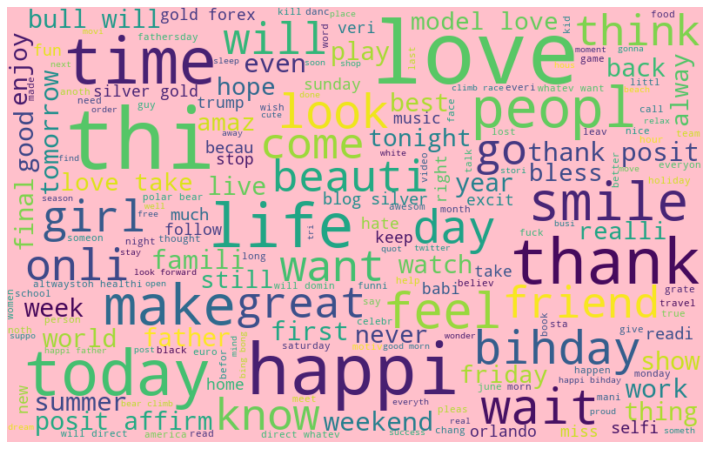

In [7]:
#Visualize the frequent words

all_words = " ".join([sentence for sentence in df[ 'clean_tweet' ]])

from wordcloud import WordCloud
wc = WordCloud(background_color='pink', width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


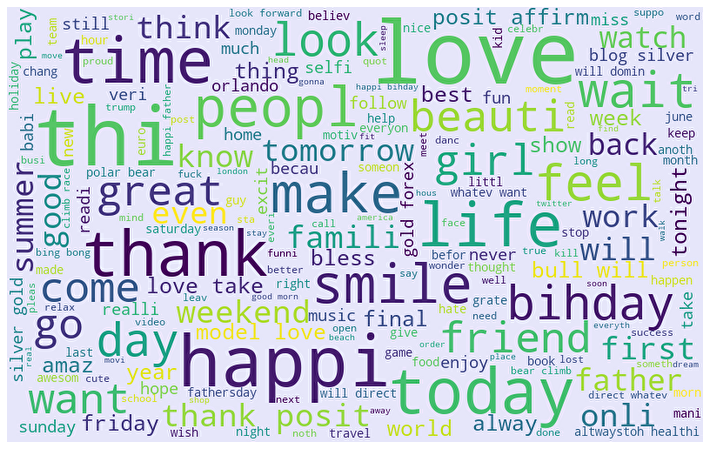

In [8]:
#visualizaton of frequent positive words

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])  #0 for positive, 1 for negative

wc = WordCloud(background_color='lavender', width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='sinc')
plt.axis('off')
plt.show()

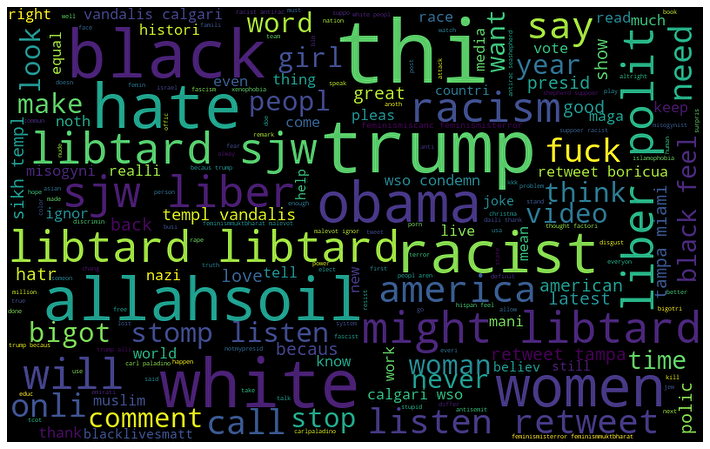

In [9]:
#visualization of frequent negative words

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wc = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='sinc')
plt.axis('off')
plt.show()

In [10]:
#for extracting the hashtag from tweet
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [11]:
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])
print('positive hashtags-', ht_positive[:5])

ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])
print('negative hashtags-', ht_negative[:3])


positive hashtags- [['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]
negative hashtags- [['cnn', 'michigan', 'tcot'], ['australia', 'opkillingbay', 'seashepherd', 'helpcovedolphin', 'thecov', 'helpcovedolphin'], []]


In [12]:
#combine everything to a single list/unnest the list
ht_positive= sum(ht_positive, [])
ht_negative= sum(ht_negative, [])
 

In [14]:
ht_positive[:10]

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate']

In [15]:
ht_negative[:10]

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump']

In [16]:
#to process the positive tweets

freq = nltk.FreqDist(ht_positive)

d = pd.DataFrame({'hashtag': list(freq.keys()),
                 'count': list(freq.values())})
d.head()

,hashtag,count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


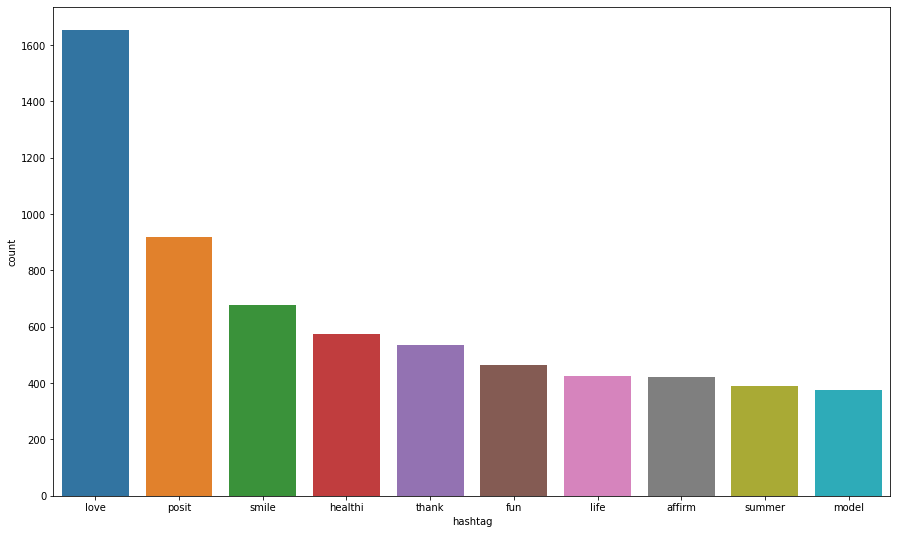

In [17]:
#graph of top 10 positive hashtags
d = d.nlargest(columns='count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='hashtag', y='count')
plt.show()

In [18]:
#to process the negative tweets

freq = nltk.FreqDist(ht_negative)

d = pd.DataFrame({'hashtag': list(freq.keys()),
                 'count': list(freq.values())})
d.head()

,hashtag,count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


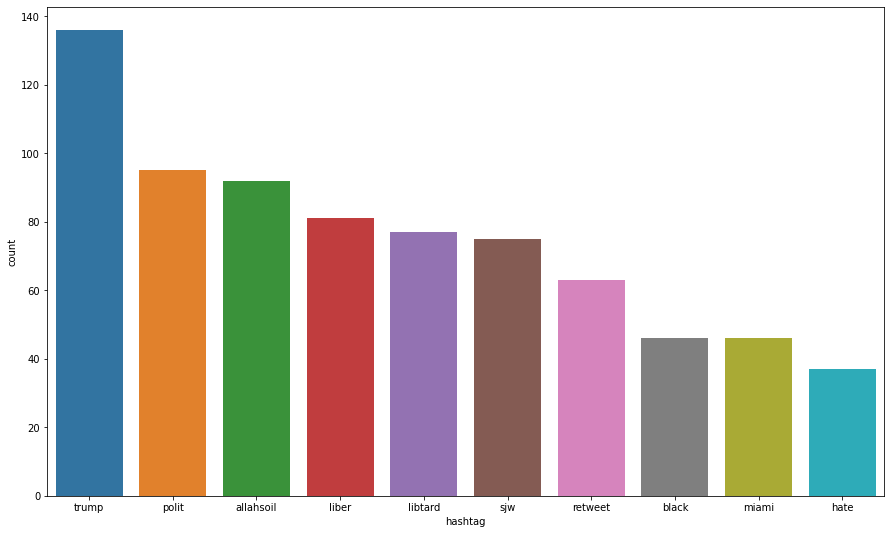

In [19]:
#graph of 10 largest negative hashtags

d=d.nlargest(columns='count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='hashtag', y='count')
plt.show()

In [20]:
#feature extraction of data
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features = 1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])
#bow[0].toarray()


In [21]:
#splitting the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow,df['label'], random_state=42 , test_size=0.25)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [23]:
# Model Training
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [24]:
# Testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.49763033175355453

In [25]:
accuracy_score(y_test, pred)

0.9469403078463271

In [26]:
# Use Probability to get output 
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5545722713864307

In [30]:
pred_prob[0][1] >= 0.3 

False